# Basit Dogrusal Regresyon

In [1]:
import pandas as pd

ad = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Advertising.csv', usecols=[1,2,3,4])
#ad = ad.iloc[:,1:len(ad)]
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
print(df.info())
print(df.describe().T)
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
           count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [3]:
print(df.isnull().any()) # Null deger bulunmamakta.

TV           False
radio        False
newspaper    False
sales        False
dtype: bool


Hem yukaridaki tablodan hem de asagidaki grafiklerden gorecegimiz uzere satislar uzerinde en cok etkisi olan iki degiskenimiz TV ve Radio'dur.

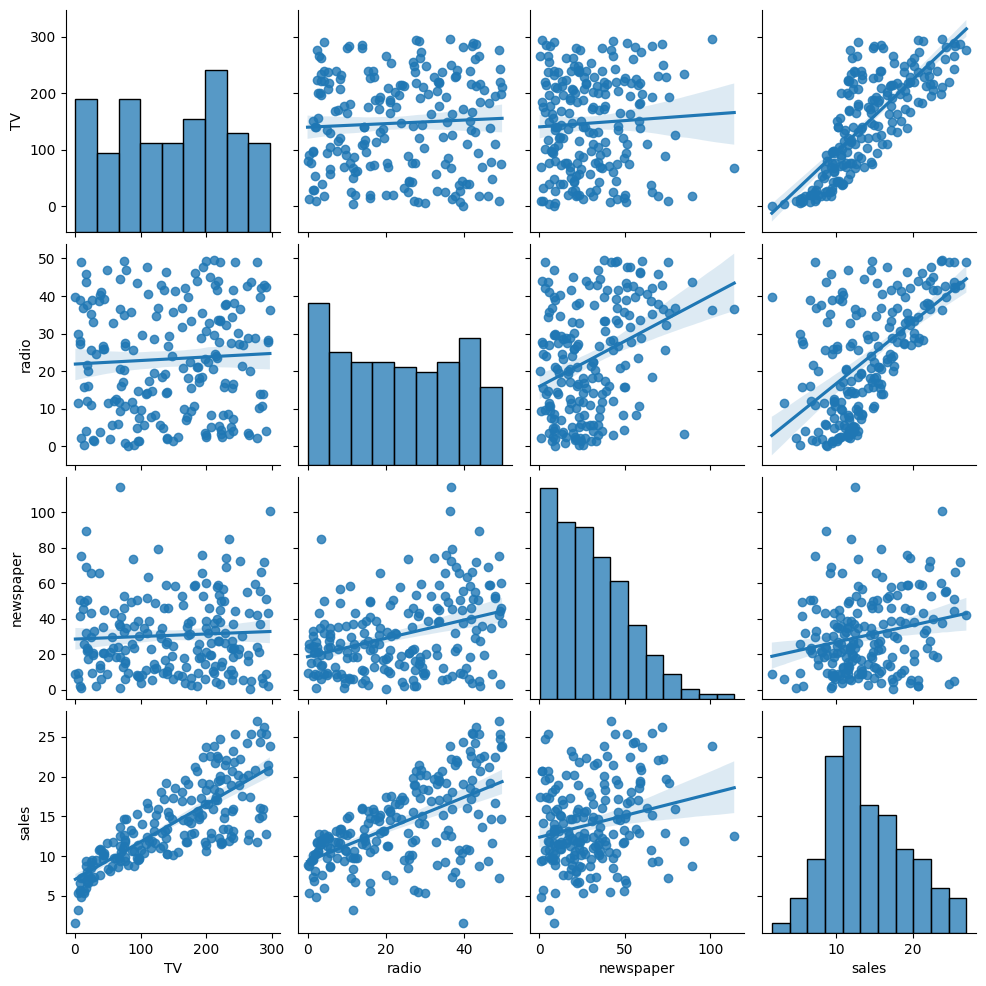

In [4]:
import seaborn as sns
sns.pairplot(df, kind='reg');

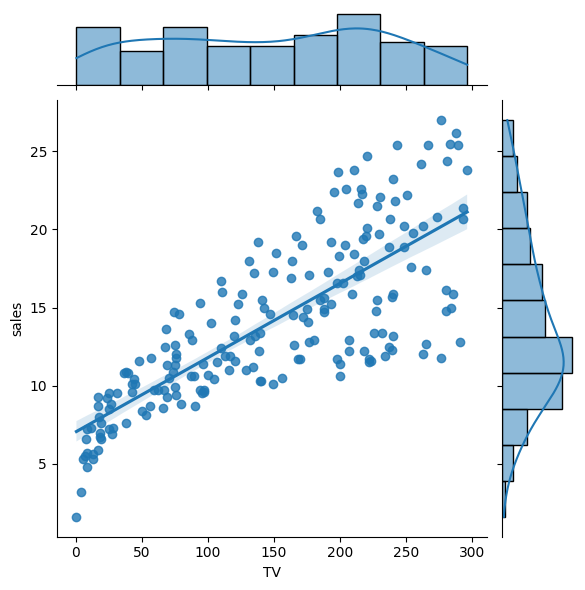

In [5]:
sns.jointplot(df, x='TV', y='sales', kind='reg');

## Statsmodels ile Modelleme

In [6]:
#!python -m pip install statsmodels

In [7]:
import statsmodels.api as sm
# depn. var.
X = df[['TV']]
print(X.head(),'\n')
# Burada teknik bir detaydan dolayi sabit birleri ekledik.
X = sm.add_constant(X)
print(X.head(),'\n')
#Indp. var.
y = df['sales']
print(y.head(),'\n')

#Linear Modeli olusturuyoruz. OLS(Ordinary Least Squares)
lm = sm.OLS(y,X)
#Modeli fit edelim.
model = lm.fit()
#Modelimizin ciktisini alalim.
model.summary()

      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8 

   const     TV
0    1.0  230.1
1    1.0   44.5
2    1.0   17.2
3    1.0  151.5
4    1.0  180.8 

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        20:46:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model.params

const    7.032594
TV       0.047537
dtype: float64

Bu sekilde genis capli ciktiyi **sklearn** ile alamiyoruz, bunun gibi genis istatistikler lazimsa **statsmodel** kullanilmalidir.

In [9]:
# Yukaridaki modelin bir diger sekilde kurulmasi
import statsmodels.formula.api as smf

lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        20:46:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Modelin parametreleri
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [11]:
# Tablolar icerisinden sadece istedigimizi secmek.
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [12]:
# Modelin katsayilarini almak
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [13]:
print('f_pvalue: ', '%.5f' % model.f_pvalue)
print('fvalue: ', '%.3f' % model.fvalue)

f_pvalue:  0.00000
fvalue:  312.145


In [14]:
# MSE degeri
model.mse_model

3314.618166868649

In [15]:
#tahmin edilen degerlerine erismek
print(model.fittedvalues[0:4])
#gercek degerler.
print(y[0:4])

0    17.970775
1     9.147974
2     7.850224
3    14.234395
dtype: float64
0    22.1
1    10.4
2     9.3
3    18.5
Name: sales, dtype: float64


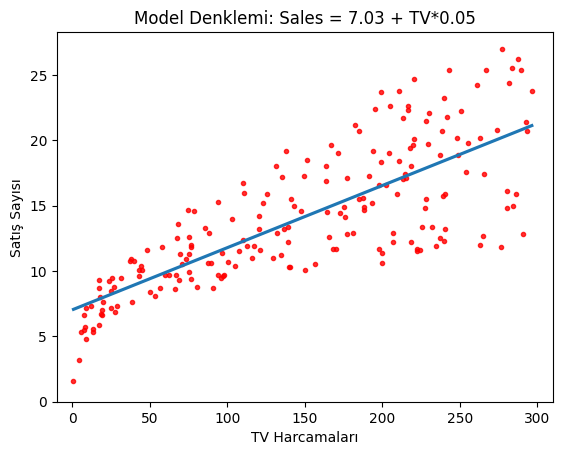

In [16]:
import seaborn as sns
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

## Scikit-learn ile modelleme

In [17]:
from sklearn.linear_model import LinearRegression

# depn. var.
X = df[['TV']]
#Indp. var.
y = df['sales']

# Modeli olusturalim
model = LinearRegression()
model = model.fit(X,y)
#Modelin b0 degeri
print(model.intercept_)
#Modelin katsayisi
print(model.coef_)
#Modelin skoru, Rkare degeri
print(model.score(X,y))
#Model sayesinde ulastigimiz tahmin degerleri
print(model.predict(X)[0:5])

7.032593549127695
[0.04753664]
0.611875050850071
[17.97077451  9.14797405  7.85022376 14.23439457 15.62721814]


## Tahmin

In [18]:
# 30 birim TV harcamasi oldugunda satislarin tahmini degeri
model.predict([[30]])

C:\Users\umutk\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [19]:
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri)

C:\Users\umutk\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

## Artiklar(Residuals) ve Makine Ogrenmesindeki Onemi

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import numpy as np

lm = smf.ols('sales ~ TV', df)
model = lm.fit()
y_pred = model.fittedvalues

mse = mean_squared_error(y, y_pred)
print('mse : ',mse)
print('rmse : ',np.sqrt(mse))

mse :  10.512652915656757
rmse :  3.2423221486546887


In [21]:
k_t = pd.DataFrame({
    'y' : y[0:10],
    'y_pred' : model.predict(X)[0:10]
})

k_t

,y,y_pred
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [22]:
# Artiklari manuel olarak hesapladik.
k_t['error'] = k_t['y'] - k_t['y_pred']
k_t

,y,y_pred,error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64


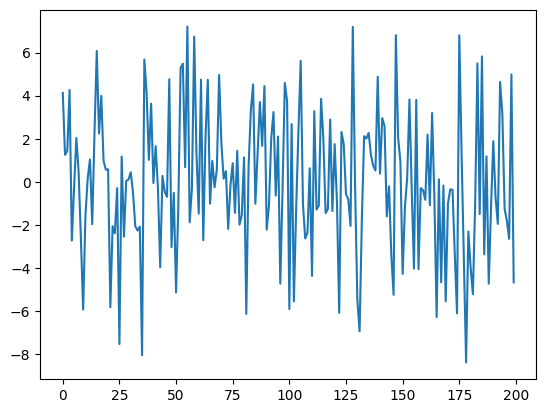

In [23]:
# Artiklarin model uzerinden cagirilmasi
print(model.resid[:10])

plt.plot(model.resid)
plt.show()

# Coklu Dogrusal Regresyon

In [24]:
import pandas as pd

ad = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Advertising.csv', usecols=[1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Burada bagimli degisken harici tum bagimsiz degiskenleri seciyoruz.
X = df.drop('sales', axis=1)
# Bagimli Degiskenimiz
y = df['sales']
#Veri setimizi test train olarak ayiriyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=55)

In [26]:
training = df.copy()
print(training.shape)
print(X_train.shape)
print(X_test.shape)

(200, 4)
(160, 3)
(40, 3)


## Statsmodels ile modelleme

In [27]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2653.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):                   3.15e-134
Time:                        20:46:31   Log-Likelihood:                         -344.71
No. Observations:                 160   AIC:                                      695.4
Df Residuals:                     157   BIC:                                      704.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0534      0.002     34.532      0.000       0.050       0.056
radio          0.2256      0.011     20.238      0.000       0.204       0.248
newspaper      0.0183      0.008      2.326      0.021       0.003       0.034
==============================================================================
Omnibus:                        7.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                9.343
Skew:                          -0.325   Prob(JB):                      0.00936
Kurtosis:                       3.990   Cond. No.                         12.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## sklearn ile modelleme

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

3.1917140157387767
[ 0.04452711  0.19566482 -0.00633216]


## Tahmin

30 birim TV harcamasi, 10 birim RADIO harcamasi, 40 birim NEWSPAPER harcamasi oldugu zaman satislarin tahmini degeri ne olur ?

In [29]:
yeni_girdi = [[30], [10], [40]]
yeni_girdi = pd.DataFrame(yeni_girdi).T
print(yeni_girdi)

model.predict(yeni_girdi)

    0   1   2
0  30  10  40


C:\Users\umutk\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.23088924])

In [30]:
# Modelin Tahmin Basarisini degerlendirelim.
print('---------Train Seti Uzerinden Tahmin Basarisi---------')
# Modelin Egitim seti uzerinde tahmin basarisi
mse = mean_squared_error(y_train, model.predict(X_train))
rmse = np.sqrt(mse)
print(mse)
print(rmse)

print('---------Test Seti Uzerinden Tahmin Basarisi---------')
# Modelin Test seti uzerinden tahmin basarisi
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(mse)
print(rmse)

---------Train Seti Uzerinden Tahmin Basarisi---------
2.9027990708269114
1.7037602738727393
---------Test Seti Uzerinden Tahmin Basarisi---------
2.473475552099437
1.5727286962789981


## Model Tunning/Model Dogrulama

In [31]:
model.score(X_test,y_test)

0.9017603460127577

In [32]:
#Modelimizin rkare skoru.
print('Test setinin rkare skoru : ', r2_score(y_test, model.predict(X_test)))
# Modelimizi dogruluyoruz(valide) ediyoruz. 10 katli cross validation yapmis olduk.
print(cross_val_score(model, X_test, y_test, cv=10, scoring='r2'))
# Bu rkare skoru daha guvenilirdir.
print('Test setinin valide edilmis rkare skoru',cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean())

Test setinin rkare skoru :  0.9017603460127577
[-0.96680225  0.98697183  0.5386636   0.75962959  0.97779832  0.95300866
  0.9416794   0.3038908   0.83791857  0.93429623]
Test setinin valide edilmis rkare skoru 0.62670547444856


In [33]:
# CV ile elde ettigimiz MSE degerleri.
-cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error')

array([2.33066066, 0.3385371 , 5.38235406, 2.33820317, 0.48355258,
       1.30668234, 0.80464205, 7.9160668 , 3.55971346, 2.17660177])

In [34]:
# Test setinin RMSE degeri
print(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
# Test setinin valide edilmis RMSE degeri
print(np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error').mean()))

1.5727286962789981
1.6320849852192385


# PCR Model

## Veri setini duzeltme

In [35]:
hitters = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Hitters.csv')
df = hitters.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [36]:
print(df.isna().sum())
df = df.dropna()
df = df.reset_index(drop=True)
print(df.isna().sum())

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64
AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64


In [37]:
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [38]:
y = df['Salary']

# Kategorik Degiskenleri dummy degisken formatina cevirelim
df_dummies = pd.get_dummies(df, dtype='int', drop_first=True)
X = df_dummies.drop('Salary', axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [39]:
# Train-Test ayrimi yapiyoruz
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=52)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


## Temel Bilesen Analizi (PCA)

**Scikit-learn icerisinde dogrudan PCR olmadigi icin bunu manuel olarak kuracagiz.**

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
print('Birinci gozlem ve tum bilesenleri \n',X_reduced_train[:1,:])

Birinci gozlem ve tum bilesenleri 
 [[ 2.63411228 -3.42095258  1.22722575 -2.51541323 -0.14091662  2.24196308
   0.19046169  0.27542063 -0.40121668 -0.0786528  -0.04115099  0.00400743
   0.01785641 -0.12913088 -0.51974172 -0.00871206  0.03910464 -0.05805705
  -0.05023088]]


In [41]:
# Ilk 10 bagimsiz degisken icin aciklanan varyansi inceleyelim.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:10]

array([41.54, 61.15, 72.1 , 79.96, 85.01, 89.36, 92.85, 95.17, 96.47,
       97.43])

In [42]:
# Mesela yaptigimiz calismaya gore varyansi aciklama yuzdesi yetiyorsa istedigimiz degisken sayisina indirebiliriz.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:6]

array([41.54, 61.15, 72.1 , 79.96, 85.01, 89.36])

**!!!** 1. degisken veri setinde bulunan toplam varyansin(degiskenligin) %31.63'unu acikliyor. 1. ve 2. degisken birlikte %50.72'sini... seklinde gidiyor.

## PCA'den yola cikarak PCR modelimizi kuruyoruz.

In [43]:
# Son olarak PCA'den yola cikarak PCR modelimizi kuralim
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
#Modelimizin katsayilarina ve sabitine bakalim.
print(pcr_model.coef_)
print(pcr_model.intercept_)

[ 106.86907132  -19.91979869   26.95110054  -43.59616611  -34.15991395
   76.95169695  -40.2359503    40.06247586  -40.71669811   55.22803373
  -71.7835009     2.60817179 -224.01047644 -255.71709484 -150.0837587
  279.00091785  359.94042966  422.40211634  312.05070208]
518.5821015228427


## Tahmin

In [44]:
# Train veri setinden yola cikarak tahminleri bulalim
y_pred_train = pcr_model.predict(X_reduced_train)
y_pred_train[:5]

array([1285.1057676 ,  302.68267481,  215.41324991,  371.33239502,
        797.10227502])

In [45]:
# Daha sonra bu degerlerle Train setimizin hatasini ve r2 skorunu bulalim.
#Train icin RMSE
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
#Train icin r2_score
r2_score(y_train, y_pred_train)

272.5298558703464


0.6165060527096233

In [46]:
# Simdi Test seti icin tahminlerde bulunacagiz bu yuzden once test uzerinden modeli kuralim.
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
print('Birinci gozlem ve tum bilesenleri \n',X_reduced_test[:1,:])

Birinci gozlem ve tum bilesenleri 
 [[ 2.59002938 -2.9069555   0.07718685 -2.75909292 -0.74586976  0.89127516
   0.42777896 -1.14210643  0.10997215 -0.50024867  0.0118068   0.04796011
   0.12341763 -0.23022013 -0.22255589 -0.07434687 -0.13839775  0.06932366
   0.01045639]]


In [47]:
y_pred_test = pcr_model.predict(X_reduced_test)
y_pred_test[:5]

array([1000.53062502,  748.74937358,  539.42534039,  207.54529088,
        575.64032112])

In [48]:
#Test icin RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))
#Test icin r2_score
r2_score(y_test, y_pred_test)

484.48703176242674


-0.03768980913004594

MODELIN DOGRULUK ORANI, HATASI FALAN COP HER SEY :D

## Model Tuning

PCR modeli icin tuning yaparken ne yapmis oluruz. Mesela kac farkli degisken sectigimizde en iyi sonucu aliyoruz ? gibi sorulara cozum uretmis olacagiz.

In [49]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

484.48703176242674


In [50]:
#Cross Validation yapalim
from sklearn.model_selection import KFold, cross_val_score
cv_10 = KFold(n_splits=10, shuffle=True, random_state=2)
#Shuffle argumani gruplara ayrilmadan once verinin karistirilip karistirilmayacagi bilgisini tasiyor.


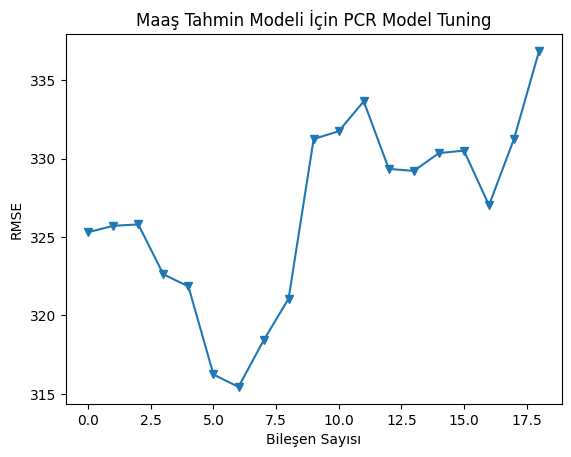

In [51]:
lm = LinearRegression()
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*cross_val_score(lm,
                                       X_reduced_train[:,:i],
                                       y_train.ravel(),
                                       cv=cv_10,
                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
    
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

Buradan yola cikarak modelimiz icin optimum bilesen sayisinin 6 oldugunu bulmus olduk.

Simdi modelimizin son halini bu optimum degere gore kuralim.

In [52]:
# Optimum bilesen degeri (6)'ne gore modelimizi kuruyoruz.
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,:6], y_train)
#Final modelimizin Train setindeki hatamiz.
y_pred = pcr_model.predict(X_reduced_train[:,:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

#Final modelimizin Test setindeki hatamiz
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_test[:,:6], y_test)
y_pred = pcr_model.predict(X_reduced_test[:,:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

302.79381798746994
386.6033818969857


# PLS

## Model

In [53]:
from sklearn.model_selection import train_test_split

hit = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Hitters.csv')
df = hit.copy()
df = df.dropna().reset_index(drop=True)
y = df["Salary"]
df_dummies = pd.get_dummies(df, dtype='int', drop_first=True)
X = df_dummies.drop('Salary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

In [54]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [55]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

pls_model = PLSRegression().fit(X_train, y_train)
pls_model.coef_

array([[ 23.06188491,  36.37119338,  18.15882552,  40.43247796,
         27.96220011,  40.10161291,   9.24070605,  26.41945372,
         32.30776653,  19.71381066,  33.19195988,  31.04411968,
         19.74781949,  48.86738155,   1.49989807, -21.6923449 ,
         31.64667867, -39.55510949,  23.72357951]])

## Tahmin

In [56]:
print('Egitim setinden yola cikarak urettigimiz tahminlerden ilk 5i\n',pls_model.predict(X_train)[:5])

y_pred_train = pls_model.predict(X_train)
#Egitim Hatasi
print('Modelin Egitim Hatasi : ',np.sqrt(mean_squared_error(y_train, y_pred_train)))
#Modelin Egitim seti uzerinde r-kare skoru.
print('Modelin Egitimde r-kare skoru : ',np.sqrt(r2_score(y_train, y_pred_train)))

Egitim setinden yola cikarak urettigimiz tahminlerden ilk 5i
 [[792.05149409]
 [470.86458173]
 [632.11279162]
 [862.13539445]
 [580.5983369 ]]
Modelin Egitim Hatasi :  332.19046585071357
Modelin Egitimde r-kare skoru :  0.656436748860351


In [57]:
print('Test setinden yola cikarak urettigimiz tahminlerden ilk 5i\n',pls_model.predict(X_test)[:5])

y_pred_test = pls_model.predict(X_test)
#Test Hatasi
print('Modelin Test Hatasi : ',np.sqrt(mean_squared_error(y_test, y_pred_test)))
#Modelin Test seti uzerinde r-kare skoru.
print('Modelin Testte r-kare skoru : ',np.sqrt(r2_score(y_test, y_pred_test)))

Test setinden yola cikarak urettigimiz tahminlerden ilk 5i
 [[668.97770255]
 [747.38511496]
 [734.69781602]
 [799.35732252]
 [660.22468688]]
Modelin Test Hatasi :  333.3198896200997
Modelin Testte r-kare skoru :  0.7127279110139151


## Model Tuning

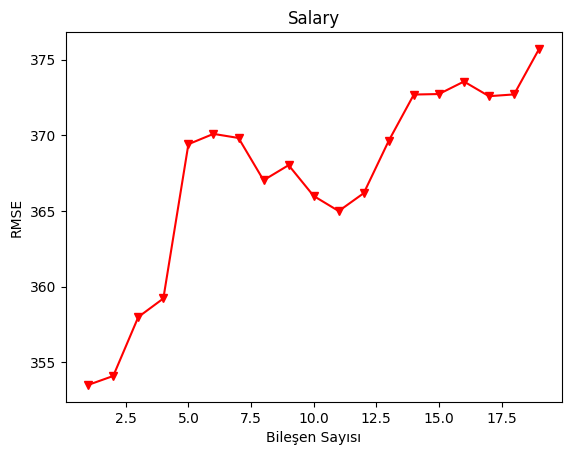

In [58]:
from sklearn import model_selection
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=2)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [59]:
# Yukaridaki bilesen sayisina gore final modelimizi kuralim.
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

#Final modelimiz icin test hatasi hesaplayalim
y_pred = pls_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

333.3198896200997


**COK ONEMLI NOT** 

Normalde düşmesini bekleriz. Ama önceki bölümlerde ifade ettiğim validasyon yöntemlerinden dolayı değerler değişecektir. Her zaman küçük olan daha iyidir denemez. Bazen daha doğrusuna erişmek isteriz. Burada elinizdeki daha doğrusudur.

Ne demek daha doğrusu?


Örneğin elde ettiğiniz ilkel test hatası 120.

Tune edilmiş model ise 130.

İlk model hiç görmediği bir veri setine sokulduğunda 180

İkinci model hiç görmediği bir veri setine sokulduğunda 140 olarak hataya sahip olabilir.

Dolayısıyla valide edilmiş ve tune edilmiş modelin en İYİ model olmasını bekleriz. En düşük hataya da sahip olmasını bekleriz ama her zaman olacaktır illaki diye bir durum yoktur. Az önceki örnekte açıkladığım üzere validasyon ya da test setlerine göre farklılık gösterebilecektir.Normalde düşmesini bekleriz. Ama önceki bölümlerde ifade ettiğim validasyon yöntemlerinden dolayı değerler değişecektir. Her zaman küçük olan daha iyidir denemez. Bazen daha doğrusuna erişmek isteriz. Burada elinizdeki daha doğrusudur.

Ne demek daha doğrusu?


Örneğin elde ettiğiniz ilkel test hatası 120.

Tune edilmiş model ise 130.

İlk model hiç görmediği bir veri setine sokulduğunda 180

İkinci model hiç görmediği bir veri setine sokulduğunda 140 olarak hataya sahip olabilir.

Dolayısıyla valide edilmiş ve tune edilmiş modelin en İYİ model olmasını bekleriz. En düşük hataya da sahip olmasını bekleriz ama her zaman olacaktır illaki diye bir durum yoktur. Az önceki örnekte açıkladığım üzere validasyon ya da test setlerine göre farklılık gösterebilecektir.